In [1]:
# Import statements
import numpy as np
import pandas as pd

In [2]:
# Import for data visualizations, relevant models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

1. EDA

In [3]:
# Load the dataset
df = pd.read_csv('../dataset/climate_soil_data.csv')

In [4]:
# Display the first few rows of the dataframe
df.head()

,CROP,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,...,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer,T_PH_H2O,S_PH_H2O,AWC_CLASS
0,barley,46.25,-62.25,1987,59.1,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
1,oats,46.25,-62.25,1987,62.1,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
2,spring_wheat,46.25,-62.25,1987,52.2,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
3,winter_wheat,46.25,-62.25,1987,52.5,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
4,barley,46.25,-62.25,1988,55.7,199.0,6.0,8.0,4.0,10.0,...,0.0,13.0,13.0,0.0,1.0,2.0,9.0,4.5,4.8,3.0


In [5]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12363 entries, 0 to 12362
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CROP         12363 non-null  object 
 1   LATITUDE     12363 non-null  float64
 2   LONGITUDE    12363 non-null  float64
 3   YEAR         12363 non-null  int64  
 4   YIELD        12363 non-null  float64
 5   GSL          12363 non-null  float64
 6   CWD_fall     12363 non-null  float64
 7   CWD_spring   12363 non-null  float64
 8   CWD_summer   12363 non-null  float64
 9   WW_fall      12363 non-null  float64
 10  WW_spring    12363 non-null  float64
 11  WW_summer    12363 non-null  float64
 12  CDD_fall     12363 non-null  float64
 13  CDD_spring   12363 non-null  float64
 14  CDD_summer   12363 non-null  float64
 15  CSDI_fall    12363 non-null  float64
 16  CSDI_spring  12363 non-null  float64
 17  CSDI_summer  12363 non-null  float64
 18  WSDI_fall    12363 non-null  float64
 19  WSDI

In [6]:
# Statistical summary of numeric columns
df.describe()

,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,WW_spring,...,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer,T_PH_H2O,S_PH_H2O,AWC_CLASS
count,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.00000,...,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000
mean,49.808966,-95.359561,1998.579956,167.603850,177.347246,5.246461,5.928658,6.635687,2.805549,1.97444,...,1.156920,22.288037,32.445118,0.525277,2.499636,2.548896,11.443905,6.063440,6.464946,1.779047
std,3.257184,18.317775,6.875589,323.767494,26.228786,4.815795,3.515251,3.992360,3.134639,2.27345,...,3.495734,10.390037,15.992216,1.216589,2.378052,2.439814,9.282354,1.072149,1.160738,1.079687
min,42.750000,-130.250000,1987.000000,2.000000,47.000000,1.000000,1.000000,2.000000,0.000000,0.00000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.400000,4.500000,1.000000
25%,46.750000,-108.750000,1993.000000,32.500000,161.000000,3.000000,4.000000,4.000000,0.000000,0.00000,...,0.000000,14.000000,19.000000,0.000000,1.000000,0.000000,5.000000,4.643299,5.100000,1.000000
50%,49.750000,-100.250000,1999.000000,45.300000,181.000000,4.000000,5.000000,6.000000,2.000000,1.00000,...,0.000000,22.000000,29.000000,0.000000,2.000000,2.000000,9.000000,6.388000,6.642000,1.000000
75%,51.250000,-76.250000,2004.000000,68.000000,197.000000,6.000000,7.000000,8.000000,5.000000,3.00000,...,0.000000,29.000000,45.000000,1.000000,4.000000,4.000000,14.000000,7.026000,7.410000,2.280000
max,57.750000,-60.750000,2010.000000,2110.000000,253.000000,66.000000,37.000000,43.000000,20.000000,13.00000,...,30.000000,62.000000,87.000000,12.000000,14.000000,12.000000,77.000000,7.531000,8.203093,5.000000


In [7]:
# Summary of categorical data
df.describe(include='object')

,CROP
count,12363
unique,14
top,spring_wheat
freq,1546


In [8]:
# Check missing parts in the dataset (null)
df.isnull().sum()

CROP           0
LATITUDE       0
LONGITUDE      0
YEAR           0
YIELD          0
GSL            0
CWD_fall       0
CWD_spring     0
CWD_summer     0
WW_fall        0
WW_spring      0
WW_summer      0
CDD_fall       0
CDD_spring     0
CDD_summer     0
CSDI_fall      0
CSDI_spring    0
CSDI_summer    0
WSDI_fall      0
WSDI_spring    0
WSDI_summer    0
CFD_fall       0
CFD_spring     0
CFD_summer     0
CSU_fall       0
CSU_spring     0
CSU_summer     0
T_PH_H2O       0
S_PH_H2O       0
AWC_CLASS      0
dtype: int64

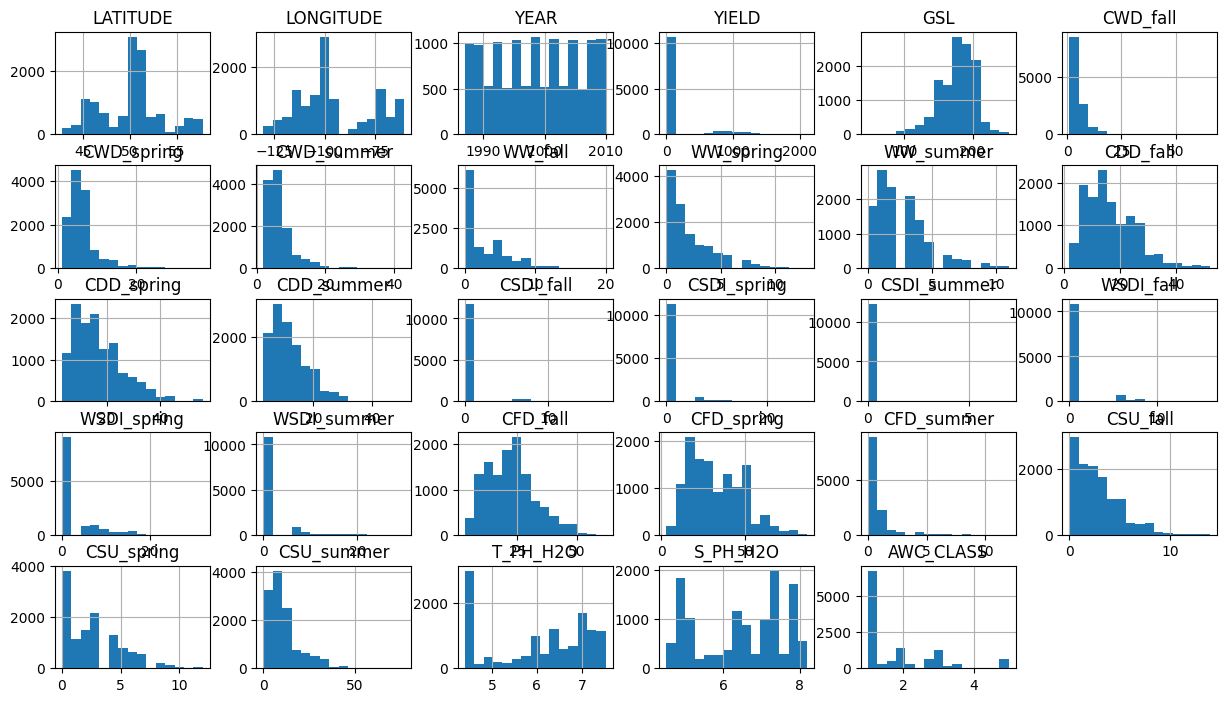

In [9]:
# Distribution of numerical features
df.hist(bins=15, figsize=(15, 10), layout=(6, 6))
plt.show()

C:\Users\clara\AppData\Local\Temp\ipykernel_34856\1038509432.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()  # Adjust subplots to fit into the figure area.


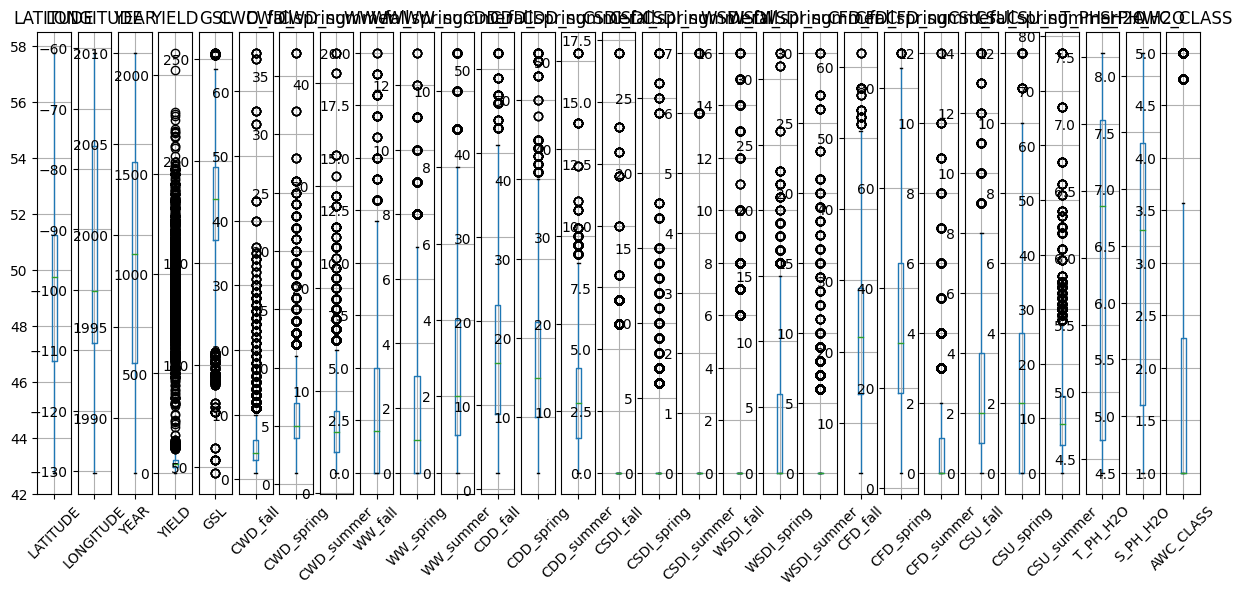

In [10]:
# Box plots for numerical columns to check for outliers
# Select numerical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size and create subplots
plt.figure(figsize=(15, 6))

# Create a boxplot for each numerical column
for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i+1)
    df.boxplot(column=col)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

In [11]:
# Print crop types
unique_values = df['CROP'].unique()
print(unique_values)

['barley' 'oats' 'spring_wheat' 'winter_wheat' 'fall_rye' 'soybeans'
 'corn' 'canola' 'canary_seed' 'durum_wheat' 'flaxseed' 'lentils'
 'mustard' 'peas']


In [12]:
df['CROP'].value_counts()

spring_wheat    1546
oats            1373
barley          1352
winter_wheat    1234
canola          1143
fall_rye         954
corn             869
peas             700
mustard          637
flaxseed         602
durum_wheat      587
canary_seed      575
lentils          456
soybeans         335
Name: CROP, dtype: int64

2. Preprocessing for Input and Output

To make it a classification problem, I grouped by crop type and got top 75% of the dataset for each. 

In [13]:
# Get the max yield for group in ['LATITUDE', 'LONGITUDE', 'YEAR']
idx = df.groupby(['LATITUDE', 'LONGITUDE', 'YEAR'])['YIELD'].transform(max) == df['YIELD']
top_yield = df[idx]

top_yield


,CROP,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,...,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer,T_PH_H2O,S_PH_H2O,AWC_CLASS
1,oats,46.25,-62.25,1987,62.1,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
5,oats,46.25,-62.25,1988,58.8,199.0,6.0,8.0,4.0,10.0,...,0.0,13.0,13.0,0.0,1.0,2.0,9.0,4.5,4.8,3.0
9,oats,46.25,-62.25,1989,73.9,203.0,9.0,4.0,7.0,11.0,...,0.0,9.0,38.0,0.0,0.0,0.0,3.0,4.5,4.8,3.0
13,oats,46.25,-62.25,1990,62.0,203.0,5.0,5.0,12.0,9.0,...,0.0,7.0,52.0,0.0,1.0,0.0,2.0,4.5,4.8,3.0
18,oats,46.25,-62.25,1991,56.7,197.0,9.0,7.0,5.0,10.0,...,0.0,13.0,46.0,0.0,1.0,0.0,3.0,4.5,4.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12349,oats,57.75,-123.25,2006,46.0,165.0,3.0,6.0,16.0,1.0,...,8.0,22.0,49.0,2.0,0.0,0.0,8.0,6.0,6.3,1.0
12353,oats,57.75,-123.25,2007,78.9,152.0,4.0,6.0,13.0,3.0,...,0.0,33.0,20.0,1.0,0.0,0.0,5.0,6.0,6.3,1.0
12355,oats,57.75,-123.25,2008,55.4,147.0,4.0,5.0,19.0,0.0,...,0.0,43.0,41.0,1.0,0.0,0.0,2.0,6.0,6.3,1.0
12358,oats,57.75,-123.25,2009,76.0,131.0,3.0,3.0,10.0,1.0,...,0.0,27.0,53.0,1.0,0.0,0.0,3.0,6.0,6.3,1.0


In [14]:
top_yield['CROP'].value_counts()

corn            394
oats            331
lentils         297
canary_seed     223
mustard         122
spring_wheat     95
winter_wheat     68
barley           33
fall_rye          9
Name: CROP, dtype: int64

In [15]:
top_yield.columns

Index(['CROP', 'LATITUDE', 'LONGITUDE', 'YEAR', 'YIELD', 'GSL', 'CWD_fall',
       'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring', 'WW_summer',
       'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall', 'CSDI_spring',
       'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer', 'CFD_fall',
       'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring', 'CSU_summer',
       'T_PH_H2O', 'S_PH_H2O', 'AWC_CLASS'],
      dtype='object')

In [16]:
# Drop latitude, longitude, and year for prediction
top_yield = top_yield.drop('LATITUDE', axis=1)
top_yield = top_yield.drop('LONGITUDE', axis=1)
top_yield = top_yield.drop('YEAR', axis=1)
top_yield

,CROP,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,WW_spring,WW_summer,CDD_fall,...,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer,T_PH_H2O,S_PH_H2O,AWC_CLASS
1,oats,62.1,192.0,5.0,7.0,4.0,4.0,6.0,2.0,6.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
5,oats,58.8,199.0,6.0,8.0,4.0,10.0,8.0,3.0,9.0,...,0.0,13.0,13.0,0.0,1.0,2.0,9.0,4.5,4.8,3.0
9,oats,73.9,203.0,9.0,4.0,7.0,11.0,4.0,1.0,8.0,...,0.0,9.0,38.0,0.0,0.0,0.0,3.0,4.5,4.8,3.0
13,oats,62.0,203.0,5.0,5.0,12.0,9.0,1.0,1.0,8.0,...,0.0,7.0,52.0,0.0,1.0,0.0,2.0,4.5,4.8,3.0
18,oats,56.7,197.0,9.0,7.0,5.0,10.0,2.0,0.0,5.0,...,0.0,13.0,46.0,0.0,1.0,0.0,3.0,4.5,4.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12349,oats,46.0,165.0,3.0,6.0,16.0,1.0,0.0,2.0,11.0,...,8.0,22.0,49.0,2.0,0.0,0.0,8.0,6.0,6.3,1.0
12353,oats,78.9,152.0,4.0,6.0,13.0,3.0,1.0,6.0,10.0,...,0.0,33.0,20.0,1.0,0.0,0.0,5.0,6.0,6.3,1.0
12355,oats,55.4,147.0,4.0,5.0,19.0,0.0,0.0,5.0,12.0,...,0.0,43.0,41.0,1.0,0.0,0.0,2.0,6.0,6.3,1.0
12358,oats,76.0,131.0,3.0,3.0,10.0,1.0,0.0,2.0,22.0,...,0.0,27.0,53.0,1.0,0.0,0.0,3.0,6.0,6.3,1.0


In [17]:
# Scale numeric values
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_ready = top_yield.copy()

scaler = StandardScaler()
# all numeric columns except yield
num_cols = ['GSL', 'CWD_fall',
       'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring', 'WW_summer',
       'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall', 'CSDI_spring',
       'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer', 'CFD_fall',
       'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring', 'CSU_summer',
       'T_PH_H2O', 'S_PH_H2O', 'AWC_CLASS']

df_ready[num_cols] = scaler.fit_transform(df_ready[num_cols])

df_ready.head()

,CROP,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,WW_spring,WW_summer,CDD_fall,...,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer,T_PH_H2O,S_PH_H2O,AWC_CLASS
1,oats,62.1,0.500227,-0.224612,0.087819,-0.756304,0.073096,1.431402,-0.282938,-0.990838,...,-0.322338,-1.085531,-0.522680,-0.445982,-0.505793,-0.889116,-0.617150,-1.156172,-1.163558,0.766992
5,oats,58.8,0.750057,-0.043726,0.336561,-0.756304,1.859215,2.246827,0.163179,-0.623711,...,-0.322338,-0.710527,-1.143357,-0.445982,-0.505793,-0.065734,-0.143092,-1.156172,-1.163558,0.766992
9,oats,73.9,0.892817,0.498934,-0.658407,-0.072892,2.156901,0.615978,-0.729056,-0.746087,...,-0.322338,-1.085531,0.408336,-0.445982,-0.952482,-0.889116,-0.854179,-1.156172,-1.163558,0.766992
13,oats,62.0,0.892817,-0.224612,-0.409665,1.066130,1.561528,-0.607159,-0.729056,-0.746087,...,-0.322338,-1.273032,1.277284,-0.445982,-0.505793,-0.889116,-0.972694,-1.156172,-1.163558,0.766992
18,oats,56.7,0.678677,0.498934,0.087819,-0.528500,1.859215,-0.199447,-1.175173,-1.113214,...,-0.322338,-0.710527,0.904878,-0.445982,-0.505793,-0.889116,-0.854179,-1.156172,-1.163558,0.766992


In [18]:

# Input as X
X = df_ready[['GSL', 'CWD_fall',
       'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring', 'WW_summer',
       'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall', 'CSDI_spring',
       'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer', 'CFD_fall',
       'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring', 'CSU_summer',
       'T_PH_H2O', 'S_PH_H2O', 'AWC_CLASS']]

# Output as Y
y = df_ready['CROP']

In [19]:
features = df_ready[['GSL', 'CWD_fall',
       'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring', 'WW_summer',
       'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall', 'CSDI_spring',
       'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer', 'CFD_fall',
       'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring', 'CSU_summer',
       'T_PH_H2O', 'S_PH_H2O', 'AWC_CLASS']]
# Just include one feature (soil) and see how accuracy changes

labels = df_ready['CROP']
target = df_ready['CROP']

In [20]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1257, 25)
Shape of testing feature: (315, 25)
Shape of training label: (1257,)
Shape of training label: (315,)


3. Modeling

In [21]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
prec = []
recall = []
f1 = []
cm = []
model = []

In [22]:
from sklearn import metrics

def eval_model(model_name, y_test, predicted_values):
    # Evaluate using accuracy, precision, recall, and f1 score
    x = metrics.accuracy_score(y_test, predicted_values)
    acc.append(x)
    prec.append(metrics.precision_score(y_test, predicted_values, average='weighted'))
    recall.append(metrics.recall_score(y_test, predicted_values, average='weighted'))
    f1.append(metrics.f1_score(y_test, predicted_values, average='weighted'))
    model.append(model_name)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted_values)

    # Print the report
    print(classification_report(y_test,predicted_values))
    print(cm)

In [23]:
# Decision Tree
# Build decision tree model
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)

# Evaluate 
eval_model('Decision Tree', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00         6
 canary_seed       0.38      0.46      0.41        52
        corn       0.71      0.86      0.78        86
     lentils       0.45      0.60      0.52        53
     mustard       0.00      0.00      0.00        26
        oats       0.64      0.64      0.64        67
spring_wheat       0.50      0.18      0.26        17
winter_wheat       0.00      0.00      0.00         8

    accuracy                           0.56       315
   macro avg       0.33      0.34      0.33       315
weighted avg       0.50      0.56      0.52       315

[[ 0  0  2  1  0  3  0  0]
 [ 0 24  0 27  0  1  0  0]
 [ 0  2 74  0  0  7  1  2]
 [ 0 19  0 32  0  2  0  0]
 [ 0 15  0 11  0  0  0  0]
 [ 0  4 19  0  0 43  0  1]
 [ 0  0  8  0  0  6  3  0]
 [ 0  0  1  0  0  5  2  0]]


c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_clas

In [24]:
# Print result
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.4031746 , 0.31428571, 0.47133758, 0.43949045, 0.37261146])

[Text(0.47291666666666665, 0.9166666666666666, 'WW_fall <= -0.373\nsamples = 1257\nvalue = [27, 171, 308, 9, 244, 96, 264, 78, 60]\nclass = spring_wheat'),
 Text(0.2125, 0.75, 'S_PH_H2O <= 0.603\nsamples = 538\nvalue = [3, 159, 22, 2, 226, 88, 26, 1, 11]\nclass = corn'),
 Text(0.09166666666666666, 0.5833333333333334, 'AWC_CLASS <= -0.198\nsamples = 167\nvalue = [3, 44, 20, 2, 33, 28, 25, 1, 11]\nclass = oats'),
 Text(0.05, 0.4166666666666667, 'GSL <= 1.16\nsamples = 131\nvalue = [2, 44, 8, 2, 33, 28, 14, 0, 0]\nclass = oats'),
 Text(0.03333333333333333, 0.25, 'CSU_spring <= -0.683\nsamples = 126\nvalue = [2, 44, 3, 2, 33, 28, 14, 0, 0]\nclass = oats'),
 Text(0.016666666666666666, 0.08333333333333333, 'samples = 73\nvalue = [2, 27, 3, 2, 12, 13, 14, 0, 0]\nclass = oats'),
 Text(0.05, 0.08333333333333333, 'samples = 53\nvalue = [0, 17, 0, 0, 21, 15, 0, 0, 0]\nclass = corn'),
 Text(0.06666666666666667, 0.25, 'samples = 5\nvalue = [0, 0, 5, 0, 0, 0, 0, 0, 0]\nclass = spring_wheat'),
 Text(

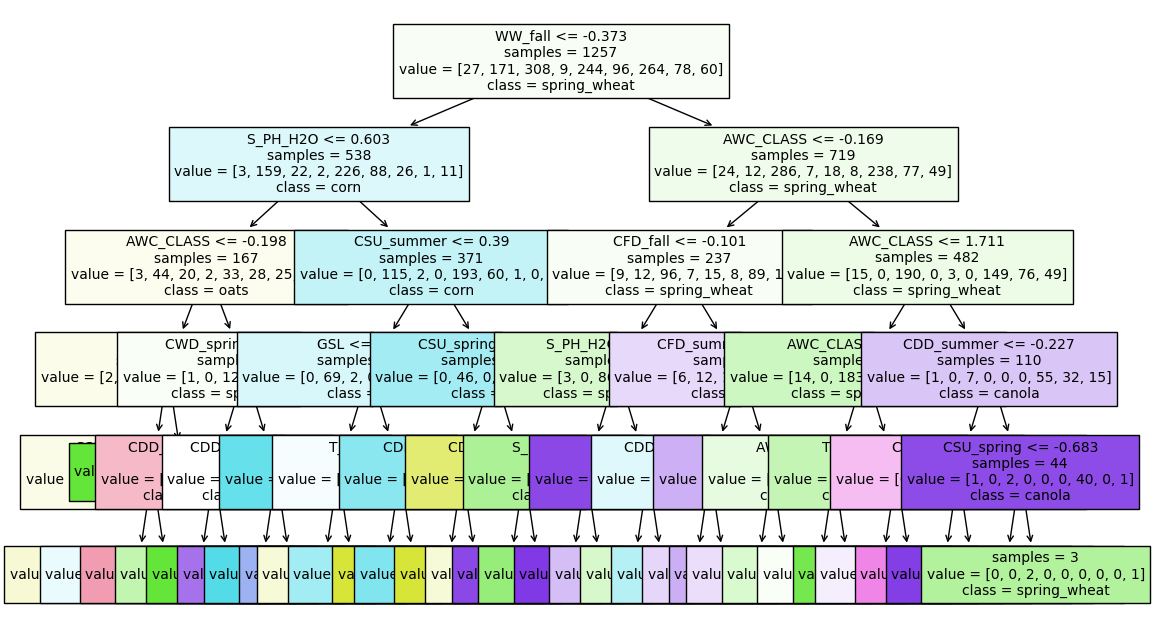

In [25]:
# Call custom_plot_tree to visualize the customized tree
from sklearn import tree
plt.figure(figsize=(12,8))
plot_tree(DecisionTree,
          feature_names=X_train.columns.tolist(),
          class_names=['barley','oats','spring_wheat','winter_wheat','corn','soybeans','canola',
                       'fall_rye','canary_seed','durum_wheat', 'flaxseed', 'lentils', 'mustard',
                       'peas'],
          filled=True,
          impurity=False,
          fontsize=10)

In [26]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

# Evaluate 
eval_model('Random Forest', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       1.00      0.17      0.29         6
 canary_seed       0.60      0.65      0.62        52
        corn       0.77      0.84      0.80        86
     lentils       0.63      0.70      0.66        53
     mustard       0.57      0.31      0.40        26
        oats       0.73      0.76      0.74        67
spring_wheat       0.54      0.41      0.47        17
winter_wheat       0.25      0.25      0.25         8

    accuracy                           0.67       315
   macro avg       0.64      0.51      0.53       315
weighted avg       0.67      0.67      0.66       315

[[ 1  0  0  0  1  4  0  0]
 [ 0 34  0 15  2  1  0  0]
 [ 0  0 72  0  0 11  0  3]
 [ 0 12  0 37  3  1  0  0]
 [ 0 10  1  7  8  0  0  0]
 [ 0  1 13  0  0 51  2  0]
 [ 0  0  5  0  0  2  7  3]
 [ 0  0  2  0  0  0  4  2]]


In [27]:
# Evaluate Model
score = cross_val_score(RF,features,target,cv=5)
score

array([0.45079365, 0.5047619 , 0.50318471, 0.49681529, 0.47133758])

In [28]:
# Naive Baytes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

# Evaluate 
eval_model('Naive Bayes', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.05      0.17      0.08         6
 canary_seed       0.56      0.35      0.43        52
        corn       1.00      0.02      0.05        86
    fall_rye       0.00      0.00      0.00         0
     lentils       0.49      0.62      0.55        53
     mustard       0.30      0.12      0.17        26
        oats       0.48      0.15      0.23        67
spring_wheat       0.00      0.00      0.00        17
winter_wheat       0.03      0.62      0.07         8

    accuracy                           0.23       315
   macro avg       0.32      0.23      0.17       315
weighted avg       0.58      0.23      0.24       315

[[ 1  0  0  2  0  0  1  0  2]
 [ 4 18  0  1 21  2  0  0  6]
 [ 2  0  2  0  0  0  9  2 71]
 [ 0  0  0  0  0  0  0  0  0]
 [ 1 11  0  1 33  3  1  0  3]
 [ 0  3  0  4 14  3  0  0  2]
 [ 9  0  0  7  0  2 10  0 39]
 [ 1  0  0  0  0  0  0  0 16]
 [ 1  0  0  0  0  0  0  2  5]]


c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: Unde

In [29]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.21587302, 0.18412698, 0.24840764, 0.21656051, 0.32802548])

In [30]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predicted_values = knn.predict(X_test)

# Evaluate
eval_model('KNN', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00         6
 canary_seed       0.61      0.71      0.65        52
        corn       0.62      0.73      0.67        86
     lentils       0.64      0.64      0.64        53
     mustard       0.46      0.23      0.31        26
        oats       0.61      0.58      0.60        67
spring_wheat       0.50      0.41      0.45        17
winter_wheat       0.00      0.00      0.00         8

    accuracy                           0.59       315
   macro avg       0.43      0.41      0.42       315
weighted avg       0.57      0.59      0.58       315

[[ 0  2  1  0  0  3  0  0]
 [ 0 37  1 10  1  3  0  0]
 [ 2  0 63  0  0 14  2  5]
 [ 0 11  3 34  4  1  0  0]
 [ 0  9  2  9  6  0  0  0]
 [ 1  2 21  0  2 39  2  0]
 [ 0  0  6  0  0  3  7  1]
 [ 0  0  4  0  0  1  3  0]]


In [31]:
# Cross validation score (KNN)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.47619048, 0.5015873 , 0.42993631, 0.44267516, 0.41719745])

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

# Evaluate
eval_model('Logistic Regression', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00         6
 canary_seed       0.54      0.37      0.44        52
        corn       0.58      0.63      0.60        86
    fall_rye       0.00      0.00      0.00         0
     lentils       0.49      0.77      0.60        53
     mustard       0.50      0.23      0.32        26
        oats       0.49      0.46      0.48        67
spring_wheat       0.39      0.41      0.40        17
winter_wheat       0.29      0.25      0.27         8

    accuracy                           0.51       315
   macro avg       0.36      0.35      0.34       315
weighted avg       0.51      0.51      0.49       315

[[ 0  1  1  1  0  0  3  0  0]
 [ 0 19  0  0 26  5  2  0  0]
 [ 0  0 54  0  0  0 22  7  3]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0 41  1  3  0  0]
 [ 0  6  0  0 14  6  0  0  0]
 [ 1  1 28  2  2  0 31  1  1]
 [ 0  0  8  0  0  0  1  7  1]
 [ 0  0  2  0  0  0  1  3  2]]


c:\Users\clara\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true sa

In [33]:
score = cross_val_score(LogReg,features,target,cv=5)
score

c:\Users\clara\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\clara\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.44761905, 0.43809524, 0.41401274, 0.56369427, 0.35031847])

In [34]:
# SVM 
from sklearn.svm import SVC

# Build SVC Model
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

# Evaluate
eval_model('SVM', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00         6
 canary_seed       0.62      0.56      0.59        52
        corn       0.61      0.91      0.73        86
     lentils       0.56      0.74      0.63        53
     mustard       0.69      0.35      0.46        26
        oats       0.68      0.48      0.56        67
spring_wheat       0.71      0.29      0.42        17
winter_wheat       0.67      0.25      0.36         8

    accuracy                           0.62       315
   macro avg       0.57      0.45      0.47       315
weighted avg       0.62      0.62      0.59       315

[[ 0  1  2  0  0  3  0  0]
 [ 0 29  0 21  1  1  0  0]
 [ 0  0 78  0  0  8  0  0]
 [ 0 10  1 39  3  0  0  0]
 [ 0  7  0 10  9  0  0  0]
 [ 0  0 35  0  0 32  0  0]
 [ 0  0 10  0  0  1  5  1]
 [ 0  0  2  0  0  2  2  2]]


c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_clas

In [35]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.47936508, 0.46031746, 0.49044586, 0.52866242, 0.56369427])

4. Model Comparison

C:\Users\clara\AppData\Local\Temp\ipykernel_34856\692061275.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_34856\692061275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = prec,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_34856\692061275.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = recall,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_34856\692061275.py:25: FutureWarning: 

Passing `palette` w

<AxesSubplot: title={'center': 'F1 Score Comparison'}, xlabel='F1 score', ylabel='Algorithm'>

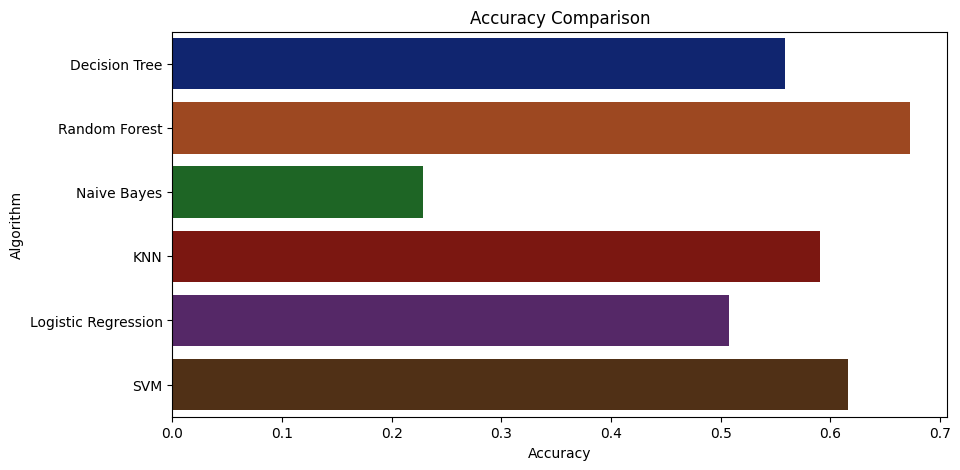

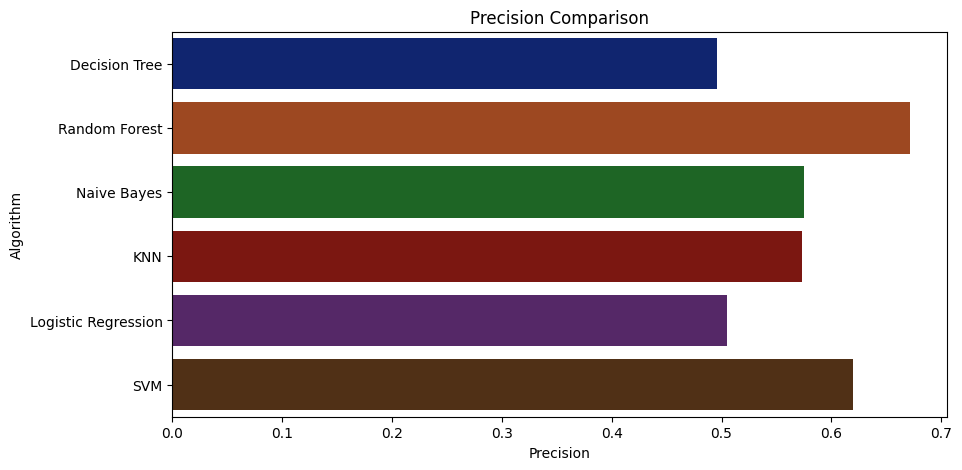

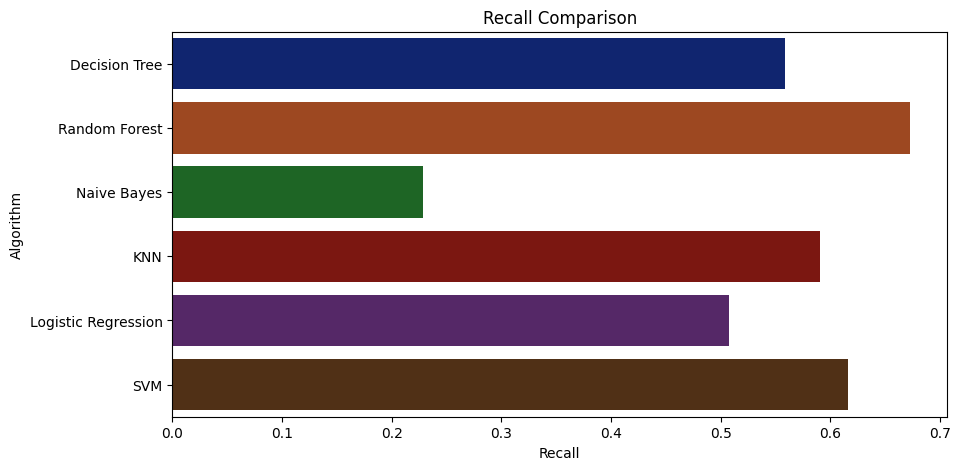

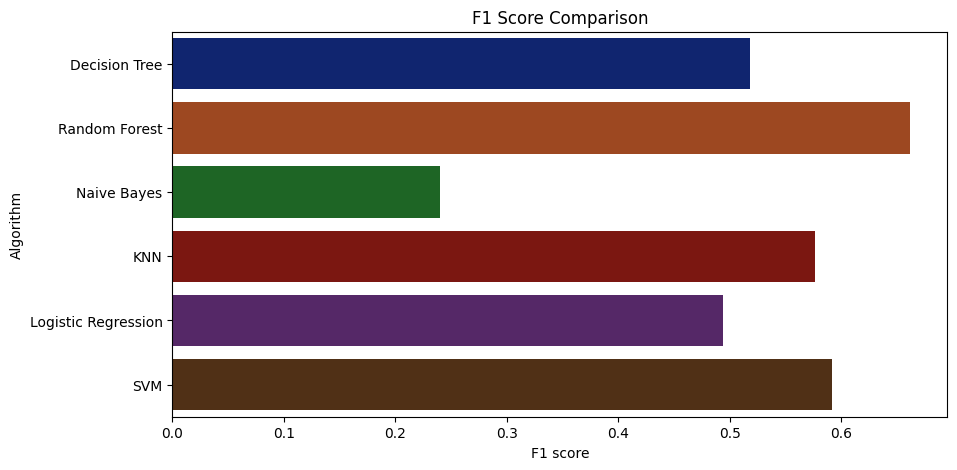

In [36]:
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
sns.barplot(x = prec,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
sns.barplot(x = recall,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('F1 Score Comparison')
plt.xlabel('F1 score')
plt.ylabel('Algorithm')
sns.barplot(x = f1,y = model,palette='dark')

5. Model Optimization

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500, 750, 1000]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


c:\Users\clara\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan 

{'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [38]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

predicted_values = best_grid.predict(X_test)

# Evaluate Model
best_grid_eval = eval_model("Best Grid", y_test, predicted_values)
best_grid_eval


              precision    recall  f1-score   support

      barley       0.00      0.00      0.00         6
 canary_seed       0.62      0.60      0.61        52
        corn       0.70      0.91      0.79        86
     lentils       0.60      0.75      0.67        53
     mustard       0.73      0.31      0.43        26
        oats       0.73      0.67      0.70        67
spring_wheat       0.56      0.29      0.38        17
winter_wheat       0.50      0.25      0.33         8

    accuracy                           0.66       315
   macro avg       0.55      0.47      0.49       315
weighted avg       0.65      0.66      0.64       315

[[ 0  1  2  0  0  3  0  0]
 [ 0 31  0 18  2  1  0  0]
 [ 0  0 78  0  0  7  0  1]
 [ 0 10  0 40  1  2  0  0]
 [ 0  8  0  9  8  1  0  0]
 [ 0  0 22  0  0 45  0  0]
 [ 0  0  8  0  0  3  5  1]
 [ 0  0  2  0  0  0  4  2]]


c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_clas

In [39]:
from joblib import dump, load

# Saving model
dump(best_grid, 'best_classification_model.joblib')
# Loading model
clf = load('best_classification_model.joblib') 